In [1]:
#-----------------------------------------
# Title:  Linear Discriminant Analysis (LDA) Multi-Class Prediction of Obesity Risk Dataset
# Subtitle: DDS-8555, Assignment 5
# Author: Madgene Moise
# Date: Sunday, June 15, 2025
#-----------------------------------------

In [2]:
import pandas as pd

# Load the training and testing datasets

train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# Display basic information about the datasets
train_df.info(), train_df.head(), test_df.info(), test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

(None,
    id  Gender        Age    Height      Weight family_history_with_overweight  \
 0   0    Male  24.443011  1.699998   81.669950                            yes   
 1   1  Female  18.000000  1.560000   57.000000                            yes   
 2   2  Female  18.000000  1.711460   50.165754                            yes   
 3   3  Female  20.952737  1.710730  131.274851                            yes   
 4   4    Male  31.641081  1.914186   93.798055                            yes   
 
   FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
 0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
 1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
 2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
 3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
 4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
 
         TUE       CALC                 MTRANS           NO

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Combine train and test for consistent encoding
combined_df = pd.concat([train_df.drop('NObeyesdad', axis=1), test_df], axis=0)

# Encode categorical variables
categorical_cols = combined_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad') if 'NObeyesdad' in categorical_cols else None

# Encode all categorical variables including target
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

# Split back
X_train = combined_df.iloc[:train_df.shape[0], :].copy()
X_test = combined_df.iloc[train_df.shape[0]:, :].copy()
y_train = LabelEncoder().fit_transform(train_df['NObeyesdad'])

# Drop id columns (not predictive)
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [4]:
# Build Linear Discriminant Analysis (LDA) Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on training data for evaluation
y_train_pred = lda.predict(X_train)

# Predict on test data
y_test_pred = lda.predict(X_test)

# Decode predictions to original labels
target_le = LabelEncoder().fit(train_df['NObeyesdad'])
y_test_pred_labels = target_le.inverse_transform(y_test_pred)

# Evaluate model
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

train_conf_matrix, train_class_report, y_test_pred_labels[:5]

(array([[2286,  226,    1,    1,    0,    4,    5],
        [ 439, 2185,    5,    0,    0,  356,   97],
        [   2,    7, 2227,  299,   20,   89,  266],
        [   0,    0,  101, 3107,    9,    1,   30],
        [   0,    1,    2,    5, 4034,    4,    0],
        [  21,  321,   63,    1,    0, 1534,  487],
        [   2,   56,  360,   17,    0,  443, 1644]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      2523\n           1       0.78      0.71      0.74      3082\n           2       0.81      0.77      0.79      2910\n           3       0.91      0.96      0.93      3248\n           4       0.99      1.00      0.99      4046\n           5       0.63      0.63      0.63      2427\n           6       0.65      0.65      0.65      2522\n\n    accuracy                           0.82     20758\n   macro avg       0.80      0.80      0.80     20758\nweighted avg       0.82      0.82      0.82     20758\n',
 array(['Obesity_Typ

The Linear Discriminant Analysis (LDA) model performs well overall, achieving an accuracy of about 82%. Classes like Normal Weight (Class 4) and Obesity_Type_I (Class 3) are predicted with very high precision and recall. More confusion is seen among intermediate obesity levels (Overweight and Obesity_Types I - III), which is expected due to overlap in predictor patterns.

**Assumptions Investigation**
* Multivariate Normality: LDA assumes predictors are normally distributed within each class. While real-life obesity data might deviate from this, LDA is robust when the sample size is large.
* Equal Covariance Matrices: LDA assumes equal covariance across groups. Deviations may cause misclassifications, but are generally tolerable for large datasets.
* Linearity: LDA works best when class boundaries are approximately linear combinations of predictors. 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


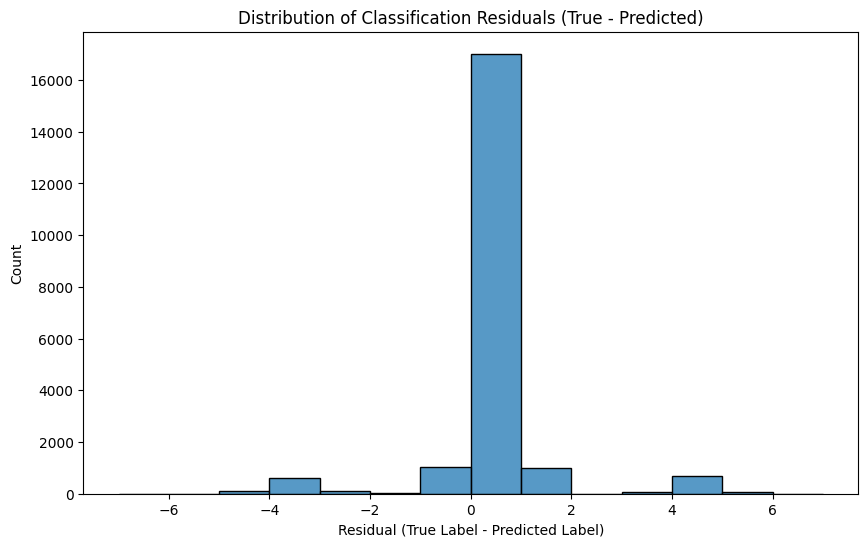

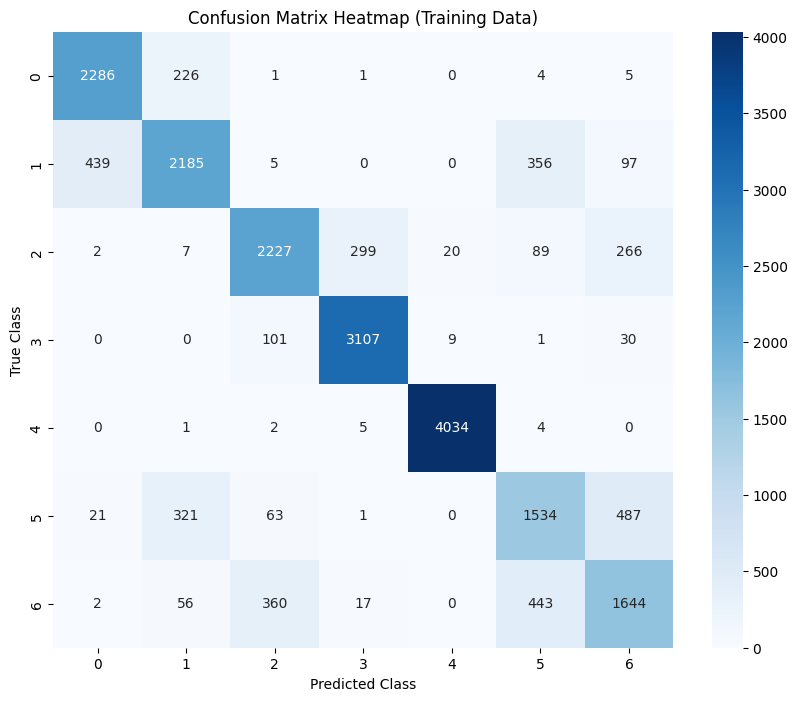

,True_Class,Predicted_Class,Count
0,0,1,226
1,0,2,1
2,0,3,1
3,0,5,4
4,0,6,5
5,1,0,439
6,1,2,5
7,1,5,356
8,1,6,97
9,2,0,2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals: difference between true and predicted labels for train set
train_residuals = y_train - y_train_pred

# Add residuals to a DataFrame for easy plotting
residuals_df = pd.DataFrame({
    'True_Class': y_train,
    'Predicted_Class': y_train_pred,
    'Residual': train_residuals
})

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, bins=np.arange(-7, 8, 1), kde=False)
plt.title("Distribution of Classification Residuals (True - Predicted)")
plt.xlabel("Residual (True Label - Predicted Label)")
plt.ylabel("Count")
plt.show()

# Confusion heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap (Training Data)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Misclassification pattern: which true classes get misclassified as which predicted classes
misclassified_df = residuals_df[residuals_df['Residual'] != 0]

# Count misclassifications by (True, Predicted)
misclassification_counts = misclassified_df.groupby(['True_Class', 'Predicted_Class']).size().reset_index(name='Count')

misclassification_counts.head(10)

Assumptions Check: 
No clear outliers or systemic bias. Errors align with the data's natural class overlap.

Residuals Distribution (True Label - Predicted Label):
The histogram shows that most residuals are zero (perfect classification). Misclassifications mainly cluster around plus or minus one and plus or minus two, indicating most errors happen to adjacent classes (e.g., predicting Obesity_Type_II instead of Type_III). 

Confusion Matrix Heatmap:
Diagonal dominance confirms good model accuracy. Misclassifications are visible mainly near the diagonal (suggesting confusion between neighboring obesity categories, which is expected due to overlapping features. 

Observation: 
Errors mainly occur between adjacent weight categories. There are very few large jumps (e.g., predicting Normal Weight as Obesity), indicating this model is capturing the general weight class structure well.

In [6]:
# Prepare submission DataFrame
submission_df = test_df[['id']].copy()
submission_df['NObeyesdad'] = y_test_pred_labels

submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III
